In [ ]:
#Ajouter STOP WORD
#Changer dans modèle de test la langue (que francais possible ?)
#Tester d autres modèles de word embedding
#Cross validation
#Chat GPT demander classer phrase
#CamemBERT au lieu de multilingual !
#augmenter les iterations

**Création et entrainement du modèle**

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import math
import bs4 as bs
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Import for text analytics
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess
from gensim import corpora
import multiprocessing

# Import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
# Import libraries for hugginface
from transformers import pipeline
import gensim.downloader

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/data/training_data.csv")


HTTPError: ignored

In [ ]:
output = data['difficulty'].value_counts().to_dict()
print(output)
total_count = sum(output.values())
output_percentages = {key: (value / total_count) * 100 for key, value in output.items()}
somme = 0
liste = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
level = 'A1'
for item in liste:
    somme += output[item]
    print(item,sum)
    if somme > 80:
        break
    else:
        level = item

level

{'A1': 813, 'C2': 807, 'C1': 798, 'B1': 795, 'A2': 795, 'B2': 792}
A1 <built-in function sum>


'A1'

In [ ]:
"""data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/BallonsB1.csv").sample(n=1000, random_state=42)], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/TribulationsB1.csv").sample(n=1000, random_state=42)], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Claudius%20Bombarnac-255.pdf_niveau_C1.csv").sample(n=1000, random_state=42)], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20L%20Ile%20mysterieuse-183.pdf_niveau_B2.csv").sample(n=1000, random_state=42)], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Le%20Chateau%20des%20Carpathes-251.pdf_niveau_C1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Les%20Cinq%20Cents%20Millions%20de%20la%20Begum-395%20(1).pdf_niveau_B2.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Les%20Cinq%20Cents%20Millions%20de%20la%20Begum-395.pdf_niveau_C1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Les%20Enfants%20du%20capitaine%20Grant-401.pdf_niveau_B2.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Michel%20Strogoff-397.pdf_niveau_B2.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Mistress%20Branican-472.pdf_niveau_C1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Un%20capitaine%20de%20quinze%20ans-471.pdf_niveau_C1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Vingt%20mille%20lieues%20sous%20les%20mers-182.pdf_niveau_B2.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/Verne%20-%20Voyages%20et%20aventures%20du%20capitaine%20Hatteras-254%20(3).pdf_niveau_C2.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/VoyageCentreB1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/terreLuneB1.csv")], ignore_index=True)
data = pd.concat([data, pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/Livres/tourmondeB1.csv")], ignore_index=True)"""
print(data.shape)

(4800, 3)


In [ ]:

#from transformers import AutoTokenizer,
from transformers import AutoTokenizer, CamembertModel
import torch
#tokenizer = .from_pretrained("bert-base-multilingual-case")
tokenizer = AutoTokenizer.from_pretrained('camembert-base')

#model = AutoModel.from_pretrained("bert-base-multilingual-cased")
model = CamembertModel.from_pretrained("camembert-base")

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
# Fonction pour calculer l'embedding d'une phrase avec BERT
def calculate_embedding(tokens):
    if tokens:
        # Tokenisation avec le tokenizer BERT
        encoded_input = tokenizer(tokens, return_tensors="pt", padding=True, truncation=True)

        # Passage des tokens à travers le modèle BERT pour obtenir les embeddings
        with torch.no_grad():
            output = model(**encoded_input)

        # Récupérer les embeddings de la couche d'attention (ou d'une autre couche selon vos besoins)
        last_hidden_states = output.last_hidden_state

        # Calculer l'embedding moyen de la phrase
        sentence_embedding = torch.mean(last_hidden_states, dim=1).squeeze().numpy()
        return sentence_embedding.tolist()
    else:
        return None

# Appliquer la fonction à la colonne 'tokenized_sentence' de votre DataFrame
data['embedding'] = data['sentence'].apply(calculate_embedding)
print(data.head())

,id,sentence,difficulty,embedding
0,0,Les coûts kilométriques réels peuvent diverger...,C1,"[0.0439305417239666, -0.012339458800852299, 0...."
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,"[0.03156253322958946, -0.06494395434856415, -0..."
2,2,Le test de niveau en français est sur le site ...,A1,"[0.017271552234888077, -0.058837730437517166, ..."
3,3,Est-ce que ton mari est aussi de Boston?,A1,"[0.004111562389880419, -0.07472146302461624, -..."
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,"[0.025271175429224968, 0.009502788074314594, -..."


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data['embedding'].tolist(), data['difficulty'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Initialize classifiers
classifier_LR = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
classifier_KNN = KNeighborsClassifier(n_neighbors=6)
classifier_GaussianNB = GaussianNB()
classifier_kernel = SVC(kernel='linear', C=1.1, random_state=42, probability=True)
classifier_RF = RandomForestClassifier(n_estimators=200, random_state=42)
classifier_tree = DecisionTreeClassifier(random_state=42)
# Fit classifiers on the training data
classifier_LR.fit(X_train, y_train)
classifier_KNN.fit(X_train, y_train)
classifier_GaussianNB.fit(X_train, y_train)
classifier_kernel.fit(X_train, y_train)
classifier_RF.fit(X_train, y_train)
classifier_tree.fit(X_train, y_train)

# Create a soft voting classifier
classifier_voting = VotingClassifier(estimators=[
    ('LR', classifier_LR),
    #('KNN', classifier_KNN),
    #('GaussianNB', classifier_GaussianNB),
    ('kernel', classifier_kernel),
   # ('RF', classifier_RF)
], voting='soft')
classifier_voting.fit(X_train, y_train)
# Create a stacking classifier
classifier_stacking = StackingClassifier(
    estimators=[
        ('LR', classifier_LR),
        #('KNN', classifier_KNN),
        #('GaussianNB', classifier_GaussianNB),
        ('kernel', classifier_kernel),
        #('RF', classifier_RF)
        ('voting',classifier_voting)
    ],
    final_estimator=classifier_kernel
)
# Fit the stacking classifier
classifier_stacking.fit(X_train, y_train)
# Make predictions on the test set
y_pred_LR = classifier_LR.predict(X_test)
y_pred_KNN = classifier_KNN.predict(X_test)
y_pred_GaussianNB = classifier_GaussianNB.predict(X_test)
y_pred_kernel = classifier_kernel.predict(X_test)
y_pred_RF = classifier_RF.predict(X_test)
y_pred_voting = classifier_voting.predict(X_test)
y_pred_stacking = classifier_stacking.predict(X_test)
y_pred_tree = classifier_tree.predict(X_test)

# Evaluate the accuracy and precision
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average="micro")
recall_stacking = recall_score(y_test, y_pred_stacking, average="micro")
f1_stacking = f1_score(y_test, y_pred_stacking, average="micro")

accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average="micro")
recall_LR = recall_score(y_test, y_pred_LR, average="micro")
f1_LR = f1_score(y_test, y_pred_LR, average="micro")

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN, average="micro")
recall_KNN = recall_score(y_test, y_pred_KNN, average="micro")
f1_KNN = f1_score(y_test, y_pred_KNN, average="micro")

accuracy_GaussianNB = accuracy_score(y_test, y_pred_GaussianNB)
precision_GaussianNB = precision_score(y_test, y_pred_GaussianNB, average="micro")
recall_GaussianNB = recall_score(y_test, y_pred_GaussianNB, average="micro")
f1_GaussianNB = f1_score(y_test, y_pred_GaussianNB, average="micro")

accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
precision_kernel = precision_score(y_test, y_pred_kernel, average="micro")
recall_kernel = recall_score(y_test, y_pred_kernel, average="micro")
f1_kernel = f1_score(y_test, y_pred_kernel, average="micro")

accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average="micro")
recall_RF = recall_score(y_test, y_pred_RF, average="micro")
f1_RF = f1_score(y_test, y_pred_RF, average="micro")

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average="micro")
recall_voting = recall_score(y_test, y_pred_voting, average="micro")
f1_voting = f1_score(y_test, y_pred_voting, average="micro")

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average="micro")
recall_tree = recall_score(y_test, y_pred_tree, average="micro")
f1_tree = f1_score(y_test, y_pred_tree, average="micro")


TypeError: ignored

In [ ]:
print("Stacking - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_stacking, precision_stacking, recall_stacking, f1_stacking))
print("LR - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_LR, precision_LR, recall_LR, f1_LR))
print("KNN - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_KNN, precision_KNN, recall_KNN, f1_KNN))
print("GaussianNB - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_GaussianNB, precision_GaussianNB, recall_GaussianNB, f1_GaussianNB))
print("Kernel - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_kernel, precision_kernel, recall_kernel, f1_kernel))
print("RF - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_RF, precision_RF, recall_RF, f1_RF))
print("Voting - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_voting, precision_voting, recall_voting, f1_voting))
print("Decision Tree - Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(accuracy_tree, precision_tree, recall_tree, f1_tree))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

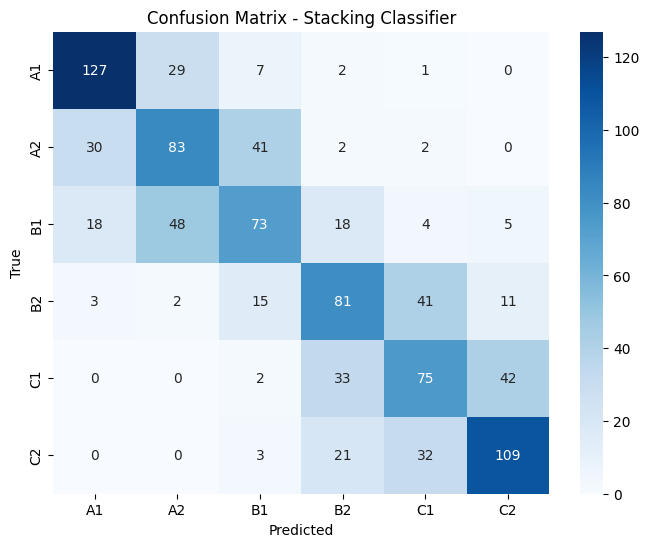

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_stacking are your true labels and predicted labels
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["A1","A2","B1","B2","C1","C2"], yticklabels=["A1","A2","B1","B2","C1","C2"])
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_test=pd.DataFrame(y_test)
predictions_LR=pd.DataFrame(y_pred_LR)

In [ ]:
y_test= y_test.reset_index(drop=True)
predictions_LR= predictions_LR.reset_index(drop=True)

In [ ]:
resultat = pd.concat([y_test, predictions_LR], axis=1)
resultat = resultat.rename(columns={resultat.columns[0]: 'difficulty'})
resultat = resultat.rename(columns={resultat.columns[1]: 'pred_LR'})
same_values_count = (resultat['difficulty'] == resultat['pred_LR']).sum()
total_rows = len(resultat)
percentage_same_values = (same_values_count / total_rows) * 100
display(percentage_same_values)
resultat['pred_kernel'] = pd.DataFrame(y_pred_kernel)
display(resultat)

58.86363636363636

,difficulty,pred_LR,pred_kernel
0,A1,A1,A1
1,B2,B2,B2
2,B1,B1,B1
3,B2,B1,A2
4,A1,A1,A1
...,...,...,...
1755,C1,C1,C1
1756,B1,B1,B1
1757,A2,C1,C1
1758,C1,C2,C2


**Test** **set**

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/training_data.csv")
#from transformers import AutoTokenizer,
#tokenizer = .from_pretrained("bert-base-multilingual-case")
tokenizer = AutoTokenizer.from_pretrained('camembert-base')

#model = AutoModel.from_pretrained("bert-base-multilingual-cased")
model = CamembertModel.from_pretrained("camembert-base")
# Fonction pour calculer l'embedding d'une phrase avec BERT
def calculate_embedding(tokens):
    if tokens:
        # Tokenisation avec le tokenizer BERT
        encoded_input = tokenizer(tokens, return_tensors="pt", padding=True, truncation=True)

        # Passage des tokens à travers le modèle BERT pour obtenir les embeddings
        with torch.no_grad():
            output = model(**encoded_input)

        # Récupérer les embeddings de la couche d'attention (ou d'une autre couche selon vos besoins)
        last_hidden_states = output.last_hidden_state

        # Calculer l'embedding moyen de la phrase
        sentence_embedding = torch.mean(last_hidden_states, dim=1).squeeze().numpy()
        return sentence_embedding.tolist()
    else:
        return None

# Appliquer la fonction à la colonne 'tokenized_sentence' de votre DataFrame
data['embedding'] = data['sentence'].apply(calculate_embedding)

# Initialize classifiers
classifier_LR = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
classifier_KNN = KNeighborsClassifier(n_neighbors=6)
classifier_GaussianNB = GaussianNB()
classifier_kernel = SVC(kernel='linear', C=1.1, random_state=42, probability=True)
classifier_RF = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit classifiers on the training data
classifier_LR.fit(data['embedding'].tolist(), data['difficulty'])
classifier_KNN.fit(data['embedding'].tolist(), data['difficulty'])
classifier_GaussianNB.fit(data['embedding'].tolist(), data['difficulty'])
classifier_kernel.fit(data['embedding'].tolist(), data['difficulty'])
classifier_RF.fit(data['embedding'].tolist(), data['difficulty'])

# Create a soft voting classifier
classifier_voting = VotingClassifier(estimators=[
    ('LR', classifier_LR),
    #('KNN', classifier_KNN),
    #('GaussianNB', classifier_GaussianNB),
    ('kernel', classifier_kernel),
    #('RF', classifier_RF)
], voting='soft')
classifier_voting.fit(data['embedding'].tolist(), data['difficulty'])
# Create a stacking classifier
classifier_stacking = StackingClassifier(
    estimators=[
        ('LR', classifier_LR),
        #('KNN', classifier_KNN),
        #('GaussianNB', classifier_GaussianNB),
        ('kernel', classifier_kernel),
        #('RF', classifier_RF)
        ('voting',classifier_voting)
    ],
    final_estimator=classifier_LR
)


classifier_stacking.fit(data['embedding'].tolist(), data['difficulty'])


StackingClassifier(estimators=[('LR', LogisticRegression(max_iter=1000)),
                               ('kernel',
                                SVC(C=1.1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('voting',
                                VotingClassifier(estimators=[('LR',
                                                              LogisticRegression(max_iter=1000)),
                                                             ('kernel',
                                                              SVC(C=1.1,
                                                                  kernel='linear',
                                                                  probability=True,
                                                                  random_state=42))],
                                                 voting='soft'))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
data_sub=pd.read_csv('https://raw.githubusercontent.com/Celso-Jorge-Sebastiao/UNIL_SBB/main/data/unlabelled_test_data.csv')

In [ ]:
data_sub['embedding'] = data_sub['sentence'].apply(calculate_embedding)

In [ ]:
data_sub['difficulty'] = classifier_stacking.predict(data_sub['embedding'].tolist())

In [ ]:
data_subfi=data_sub[['id','difficulty']]
display(data_subfi)

In [ ]:
data_subfi.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>